<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-TelecomX_parte2-/blob/main/ONE_TelecomX_BR_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Telecom X - Análise de Evasão de Clientes - Parte 2


🎯 Missão

A missão desse trabalho é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

Os dados foram previamente tratados e analisados na parte 1 do projeto, disponível em: https://github.com/mauricioaalmeida/ONE-TelecomX

🧠 Objetivos do Desafio

   1. Preparar os dados para a modelagem (tratamento, encoding, normalização).

   2. Realizar análise de correlação e seleção de variáveis.

   3. Treinar dois ou mais modelos de classificação.

   4. Avaliar o desempenho dos modelos com métricas.

   5. Interpretar os resultados, incluindo a importância das variáveis.

   6. Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

🧰 Ferramentas:

  - Google Colab
  - Python
  - Pandas
  - Scikit-Learn
  - MatplotLib
  - Seaborn
  

# Material de apoio:

### Dicionário de dados original

  

    customerID: número de identificação único de cada cliente
    Churn: se o cliente deixou ou não a empresa
    gender: gênero (masculino e feminino)
    SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    Partner: se o cliente possui ou não um parceiro ou parceira
    Dependents: se o cliente possui ou não dependentes
    tenure: meses de contrato do cliente
    PhoneService: assinatura de serviço telefônico
    MultipleLines: assisnatura de mais de uma linha de telefone
    InternetService: assinatura de um provedor internet
    OnlineSecurity: assinatura adicional de segurança online
    OnlineBackup: assinatura adicional de backup online
    DeviceProtection: assinatura adicional de proteção no dispositivo
    TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    StreamingTV: assinatura de TV a cabo
    StreamingMovies: assinatura de streaming de filmes
    Contract: tipo de contrato
    PaperlessBilling: se o cliente prefere receber online a fatura
    PaymentMethod: forma de pagamento
    Charges.Monthly: total de todos os serviços do cliente por mês
    Charges.Total: total gasto pelo cliente


Novo Dicionário de dados

- ID_Cliente (customerID): número de identificação único de cada cliente
- Churn (Churn): se o cliente deixou ou não a empresa
- Genero (gender): gênero (masculino e feminino)
- Idoso (SeniorCitizen): informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Casal (Partner): se o cliente possui ou não um parceiro ou parceira
- Dependentes (Dependents): se o cliente possui ou não dependentes
- Tempo_Contrato (tenure): meses de contrato do cliente
- Servico_Telefone (PhoneService): assinatura de serviço telefônico
- Servico_MultiplasLinhas (MultipleLines): assinatura de mais de uma linha de telefone
- Servico_Internet (InternetService): assinatura de um provedor internet
- Opt_OnlineSecurity (OnlineSecurity): assinatura adicional de segurança online
- Opt_OnlineBackup (OnlineBackup): assinatura adicional de backup online
- Opt_DeviceProtection (DeviceProtection): assinatura adicional de proteção no dispositivo
- Opt_TechSupport (TechSupport): assinatura adicional de suporte técnico, menos tempo de espera
- Opt_StreamingTV (StreamingTV): assinatura de TV a cabo
- Opt_StreamingMovies (StreamingMovies): assinatura de streaming de filmes
- Tipo_Contrato (Contract): tipo de contrato
- FaturaOnline (PaperlessBilling): se o cliente prefere receber online a fatura
- Forma_Pagto (PaymentMethod): forma de pagamento
- Conta_Mensal (Charges.Monthly): total de todos os serviços do cliente por mês
- Conta_Diarias (N/A): total de todos os serviços do cliente por mês
- Conta_Total (Charges.Total): total gasto pelo cliente


## Preparação do ambiente:

In [1]:
# Importação de Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os

In [2]:
#Criar a estrutura de diretórios para a armazenar os dados
!mkdir -p data
!mkdir -p data/bronze
!mkdir -p data/prata
!mkdir -p data/ouro
!mkdir -p data/Images

In [3]:
url ='https://raw.githubusercontent.com/mauricioaalmeida/ONE-TelecomX/refs/heads/main/data/prata/TelecomX_Data.parquet'
r = requests.get(url)
with open('data/prata/TelecomX_Data.parquet', 'wb') as f:
    f.write(r.content)

#🎲 1. Preparar os dados para a modelagem (tratamento, encoding, normalização).

### Carga dos dados

In [4]:
#Iniciando com o arquivo Parquet salvo na camada prata:
df = pd.read_parquet('data/prata/TelecomX_Data.parquet')


### Analise de Features

In [5]:
df.head()

,ID_Cliente,Churn,Genero,Idoso,Casal,Dependentes,Tempo_Contrato,Servico_Telefone,Servico_MultiplasLinhas,Servico_Internet,...,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,Tipo_Contrato,FaturaOnline,Forma_Pagto,Conta_Mensal,Conta_Total,Conta_Diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_Cliente               7032 non-null   object  
 1   Churn                    7032 non-null   int64   
 2   Genero                   7032 non-null   category
 3   Idoso                    7032 non-null   int64   
 4   Casal                    7032 non-null   int64   
 5   Dependentes              7032 non-null   int64   
 6   Tempo_Contrato           7032 non-null   int64   
 7   Servico_Telefone         7032 non-null   int64   
 8   Servico_MultiplasLinhas  7032 non-null   int64   
 9   Servico_Internet         7032 non-null   category
 10  Opt_OnlineSecurity       7032 non-null   int64   
 11  Opt_OnlineBackup         7032 non-null   int64   
 12  Opt_DeviceProtection     7032 non-null   int64   
 13  Opt_TechSupport          7032 non-null   int64   
 14  Opt_Streaming

In [7]:
df.nunique()

,0
ID_Cliente,7032
Churn,2
Genero,2
Idoso,2
Casal,2
Dependentes,2
Tempo_Contrato,72
Servico_Telefone,2
Servico_MultiplasLinhas,2
Servico_Internet,3


In [8]:
col_alvo = 'Churn'
col_id = 'ID_Cliente'

colunas = df.columns.tolist()
col_categoricas = df.select_dtypes(include=['object','category']).columns.tolist()
col_numericas = df.select_dtypes(include=['number']).columns.tolist()
col_categoricas.remove(col_id)
col_numericas.remove(col_alvo)
print (f'Categoricas: {col_categoricas}')
print (f'Numéricas: {col_numericas}')

Categoricas: ['Genero', 'Servico_Internet', 'Tipo_Contrato', 'Forma_Pagto']
Numéricas: ['Idoso', 'Casal', 'Dependentes', 'Tempo_Contrato', 'Servico_Telefone', 'Servico_MultiplasLinhas', 'Opt_OnlineSecurity', 'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'FaturaOnline', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']


In [9]:
col_numericas_binarias = ['Idoso', 'Casal', 'Dependentes',  'Servico_Telefone', 'Servico_MultiplasLinhas', 'Opt_OnlineSecurity', 'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'FaturaOnline']
col_numericas_discretas = ['Tempo_Contrato']
col_numericas_continuas = ['Conta_Mensal', 'Conta_Total', 'Conta_Diarias']

In [10]:
# Verificação das colunas binarias:
for col in col_numericas_binarias:
  print(f'{col}: {df[col].unique()}')


Idoso: [0 1]
Casal: [1 0]
Dependentes: [1 0]
Servico_Telefone: [1 0]
Servico_MultiplasLinhas: [0 1]
Opt_OnlineSecurity: [0 1]
Opt_OnlineBackup: [1 0]
Opt_DeviceProtection: [0 1]
Opt_TechSupport: [1 0]
Opt_StreamingTV: [1 0]
Opt_StreamingMovies: [0 1]
FaturaOnline: [1 0]


In [11]:
# Verificação das colunas discretas:
for col in col_numericas_discretas:
  print(f'{col}: {df[col].unique()}')


Tempo_Contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


<Axes: xlabel='Tempo_Contrato', ylabel='Count'>

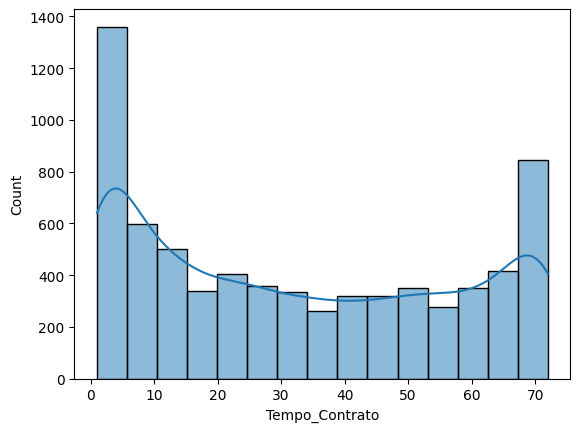

In [12]:
sns.histplot(df['Tempo_Contrato'], kde=True)

In [13]:
# Verificação das colunas contínuas:
for col in col_numericas_continuas:
  print(f'{col}: Min:{df[col].min()} - Media:{df[col].mean()} - Max:{df[col].max()}')

Conta_Mensal: Min:18.25 - Media:64.79820819112628 - Max:118.75
Conta_Total: Min:18.8 - Media:2283.3004408418656 - Max:8684.8
Conta_Diarias: Min:0.6083333333333333 - Media:2.1599402730375425 - Max:3.9583333333333335


<Axes: xlabel='Conta_Diarias', ylabel='Count'>

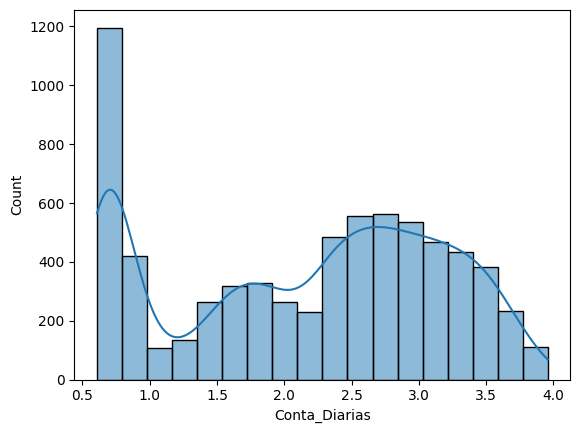

In [14]:
sns.histplot(df['Conta_Diarias'], kde=True)


In [15]:
# Verificação das colunas categoricas:
for col in col_categoricas:
  print(f'{col}: {df[col].unique()}')
  print('--------------------------------')

Genero: ['Feminino', 'Masculino']
Categories (2, object): ['Feminino', 'Masculino']
--------------------------------
Servico_Internet: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
--------------------------------
Tipo_Contrato: ['One year', 'Month-to-month', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']
--------------------------------
Forma_Pagto: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',
                         'Mailed check']
--------------------------------


In [16]:
# Tratar a coluna Forma_Pagto
df['Forma_Pagto'] = df['Forma_Pagto'].str.replace(' (automatic)', '')
df['Forma_Pagto'].unique()

array(['Mailed check', 'Electronic check', 'Credit card', 'Bank transfer'],
      dtype=object)

### Eliminar colunas desnecessárias:

In [17]:
col_remover = ['ID_Cliente','Conta_Mensal', 'Conta_Total']
for col in col_remover:
  try:
    colunas.remove(col)
    col_numericas.remove(col)
    col_numericas_binarias.remove(col)
    col_numericas_discretas.remove(col)
    col_numericas_continuas.remove(col)
  except:
    pass
df = df.drop(columns=col_remover, axis=1)

### Transformar colunas categoricas

In [18]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [19]:
col_categoricas

['Genero', 'Servico_Internet', 'Tipo_Contrato', 'Forma_Pagto']

In [20]:
one_hot = make_column_transformer((
    OneHotEncoder( handle_unknown= 'ignore', drop = 'if_binary'),
    col_categoricas),
    remainder='passthrough',
    sparse_threshold=0)

df_enc = one_hot.fit_transform(df)

In [21]:
one_hot.get_feature_names_out()

array(['onehotencoder__Genero_Masculino',
       'onehotencoder__Servico_Internet_DSL',
       'onehotencoder__Servico_Internet_Fiber optic',
       'onehotencoder__Servico_Internet_No',
       'onehotencoder__Tipo_Contrato_Month-to-month',
       'onehotencoder__Tipo_Contrato_One year',
       'onehotencoder__Tipo_Contrato_Two year',
       'onehotencoder__Forma_Pagto_Bank transfer',
       'onehotencoder__Forma_Pagto_Credit card',
       'onehotencoder__Forma_Pagto_Electronic check',
       'onehotencoder__Forma_Pagto_Mailed check', 'remainder__Churn',
       'remainder__Idoso', 'remainder__Casal', 'remainder__Dependentes',
       'remainder__Tempo_Contrato', 'remainder__Servico_Telefone',
       'remainder__Servico_MultiplasLinhas',
       'remainder__Opt_OnlineSecurity', 'remainder__Opt_OnlineBackup',
       'remainder__Opt_DeviceProtection', 'remainder__Opt_TechSupport',
       'remainder__Opt_StreamingTV', 'remainder__Opt_StreamingMovies',
       'remainder__FaturaOnline', 'remai

In [22]:
df_enc = pd.DataFrame(df_enc, columns=one_hot.get_feature_names_out()).copy()
df_enc

,onehotencoder__Genero_Masculino,onehotencoder__Servico_Internet_DSL,onehotencoder__Servico_Internet_Fiber optic,onehotencoder__Servico_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Forma_Pagto_Bank transfer,onehotencoder__Forma_Pagto_Credit card,onehotencoder__Forma_Pagto_Electronic check,...,remainder__Servico_Telefone,remainder__Servico_MultiplasLinhas,remainder__Opt_OnlineSecurity,remainder__Opt_OnlineBackup,remainder__Opt_DeviceProtection,remainder__Opt_TechSupport,remainder__Opt_StreamingTV,remainder__Opt_StreamingMovies,remainder__FaturaOnline,remainder__Conta_Diarias
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.186667
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.996667
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.463333
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.266667
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.838333
7028,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.836667
7029,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.676667
7030,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.261667


### Normalizar colunas Numericas discretas e contínuas

In [23]:
col_numericas

['Idoso',
 'Casal',
 'Dependentes',
 'Tempo_Contrato',
 'Servico_Telefone',
 'Servico_MultiplasLinhas',
 'Opt_OnlineSecurity',
 'Opt_OnlineBackup',
 'Opt_DeviceProtection',
 'Opt_TechSupport',
 'Opt_StreamingTV',
 'Opt_StreamingMovies',
 'FaturaOnline',
 'Conta_Diarias']

In [24]:
df_enc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   onehotencoder__Genero_Masculino              7032 non-null   float64
 1   onehotencoder__Servico_Internet_DSL          7032 non-null   float64
 2   onehotencoder__Servico_Internet_Fiber optic  7032 non-null   float64
 3   onehotencoder__Servico_Internet_No           7032 non-null   float64
 4   onehotencoder__Tipo_Contrato_Month-to-month  7032 non-null   float64
 5   onehotencoder__Tipo_Contrato_One year        7032 non-null   float64
 6   onehotencoder__Tipo_Contrato_Two year        7032 non-null   float64
 7   onehotencoder__Forma_Pagto_Bank transfer     7032 non-null   float64
 8   onehotencoder__Forma_Pagto_Credit card       7032 non-null   float64
 9   onehotencoder__Forma_Pagto_Electronic check  7032 non-null   float64
 10  

In [25]:
col_normalizar = []
for col in col_numericas:
  if col not in col_numericas_binarias:
    col_normalizar.append('remainder__'+col)
col_normalizar

['remainder__Tempo_Contrato', 'remainder__Conta_Diarias']

In [26]:
for col in col_normalizar:
  df_enc[col] = MinMaxScaler().fit_transform(df_enc[[col]])


In [27]:
df_enc.head()

,onehotencoder__Genero_Masculino,onehotencoder__Servico_Internet_DSL,onehotencoder__Servico_Internet_Fiber optic,onehotencoder__Servico_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Forma_Pagto_Bank transfer,onehotencoder__Forma_Pagto_Credit card,onehotencoder__Forma_Pagto_Electronic check,...,remainder__Servico_Telefone,remainder__Servico_MultiplasLinhas,remainder__Opt_OnlineSecurity,remainder__Opt_OnlineBackup,remainder__Opt_DeviceProtection,remainder__Opt_TechSupport,remainder__Opt_StreamingTV,remainder__Opt_StreamingMovies,remainder__FaturaOnline,remainder__Conta_Diarias
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234


<Axes: xlabel='remainder__Conta_Diarias', ylabel='Count'>

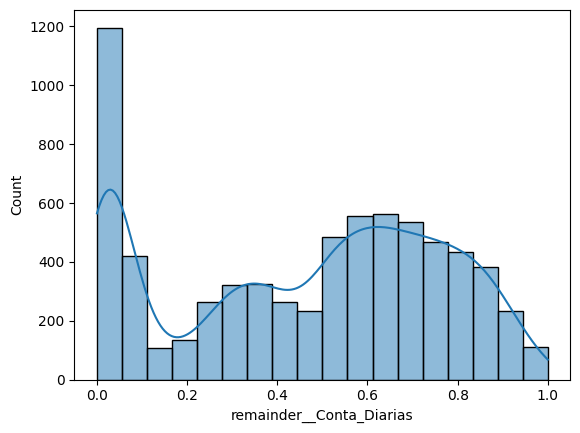

In [28]:
sns.histplot(df_enc['remainder__Conta_Diarias'], kde=True)

<Axes: xlabel='remainder__Tempo_Contrato', ylabel='Count'>

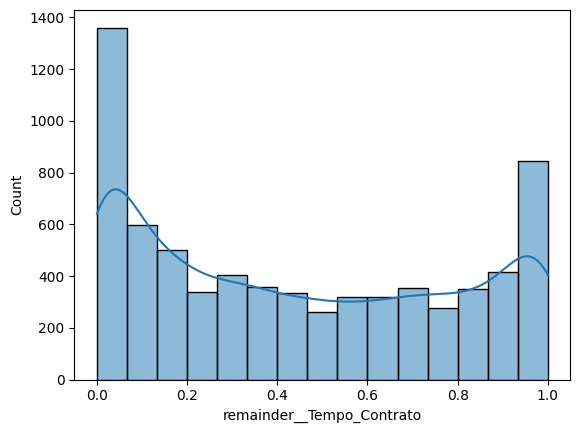

In [29]:
sns.histplot(df_enc['remainder__Tempo_Contrato'], kde=True)

### Balanceamento de Classes

<Axes: xlabel='remainder__Churn', ylabel='Count'>

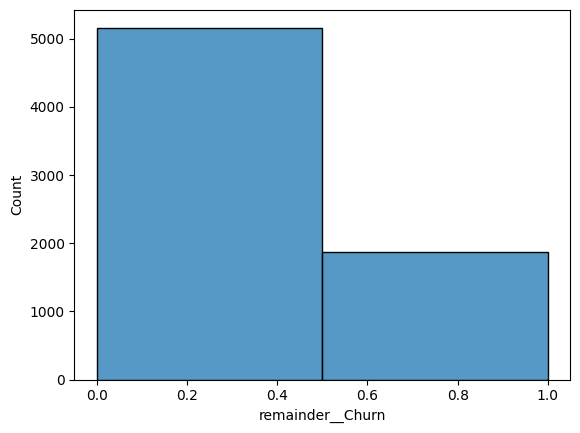

In [30]:
sns.histplot(df_enc['remainder__Churn'],bins=2)

In [31]:
coluna_alvo = 'remainder__Churn'

novas_colunas = [col for col in df_enc.columns if col != coluna_alvo] + [coluna_alvo]

# Reorganizar o DataFrame com a nova ordem de colunas
df_enc = df_enc[novas_colunas]

In [32]:
df_enc['remainder__Churn'].value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.734215
1.0,0.265785


OBS: Devido ao desbalanceamento entre as classes, é interessante realizar um balanceamento de classes, antes da utilização dos modelos de classificação.

Vamos utilizar o SMOTE para gerar dados sintéticos de Churn, mas antes vamos analisar a correlação e seleção de Features


#📊 2. Realizar análise de correlação e seleção de variáveis.

In [33]:
corr = df_enc.corr()

corr.columns=corr.columns.str.replace('remainder__','')
corr.columns=corr.columns.str.replace('onehotencoder__','')
corr.index=corr.index.str.replace('remainder__','')
corr.index=corr.index.str.replace('onehotencoder__','')
corr.head()

,Genero_Masculino,Servico_Internet_DSL,Servico_Internet_Fiber optic,Servico_Internet_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagto_Bank transfer,Forma_Pagto_Credit card,Forma_Pagto_Electronic check,...,Servico_MultiplasLinhas,Opt_OnlineSecurity,Opt_OnlineBackup,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,FaturaOnline,Conta_Diarias,Churn
Genero_Masculino,1.000000,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,...,-0.008883,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.011902,-0.013779,-0.008545
Servico_Internet_DSL,0.007584,1.000000,-0.641636,-0.379912,-0.065226,0.047300,0.030924,0.024760,0.051222,-0.104293,...,-0.200318,0.320343,0.156765,0.145150,0.312183,0.014973,0.025623,-0.063390,-0.161368,-0.124141
Servico_Internet_Fiber optic,-0.011189,-0.641636,1.000000,-0.465736,0.243014,-0.076809,-0.209965,-0.022779,-0.050552,0.335763,...,0.366420,-0.030506,0.165940,0.176356,-0.020299,0.329744,0.322457,0.326470,0.787195,0.307463
Servico_Internet_No,0.004745,-0.379912,-0.465736,1.000000,-0.217824,0.038061,0.217542,-0.001094,0.001870,-0.284608,...,-0.210794,-0.332799,-0.380990,-0.380151,-0.335695,-0.414951,-0.418450,-0.320592,-0.763191,-0.227578
Tipo_Contrato_Month-to-month,-0.003251,-0.065226,0.243014,-0.217824,1.000000,-0.570053,-0.621933,-0.180159,-0.204960,0.330879,...,-0.088558,-0.246844,-0.164393,-0.225988,-0.285491,-0.112550,-0.117867,0.168296,0.058933,0.404565


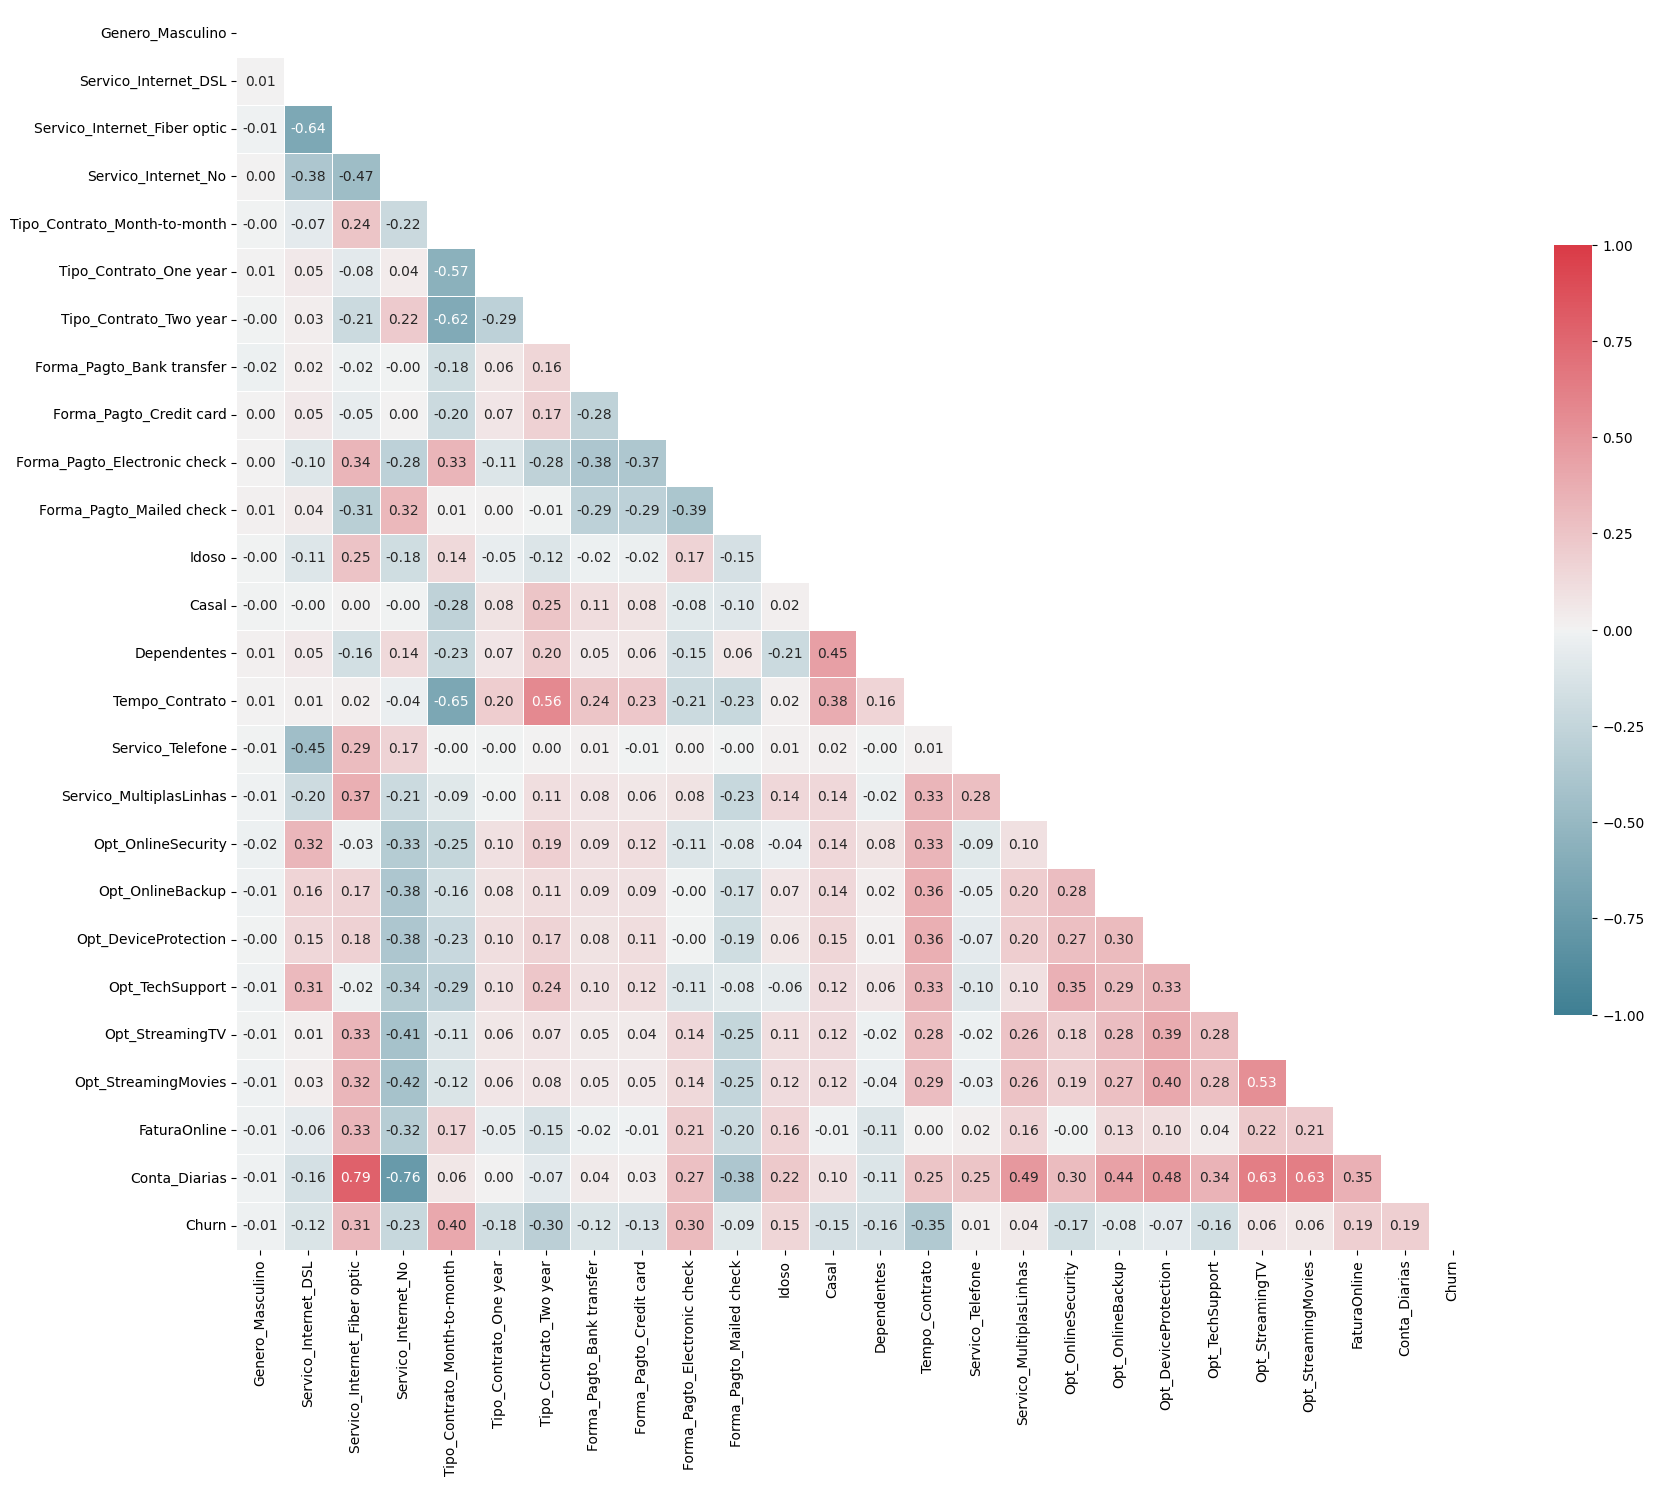

In [34]:
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

### Analisando a correlação das Features com a Coluna Alvo

In [35]:
correlacao_alvo = pd.DataFrame(corr[col_alvo])
correlacao_alvo = correlacao_alvo.sort_values(by=col_alvo, ascending=False)
correlacao_alvo_top10 = correlacao_alvo[1:11].T
correlacao_alvo_top10

,Tipo_Contrato_Month-to-month,Servico_Internet_Fiber optic,Forma_Pagto_Electronic check,Conta_Diarias,FaturaOnline,Idoso,Opt_StreamingTV,Opt_StreamingMovies,Servico_MultiplasLinhas,Servico_Telefone
Churn,0.404565,0.307463,0.301455,0.192858,0.191454,0.150541,0.063254,0.06086,0.040033,0.011691


### Gráfico com as 10 maiores correlações:

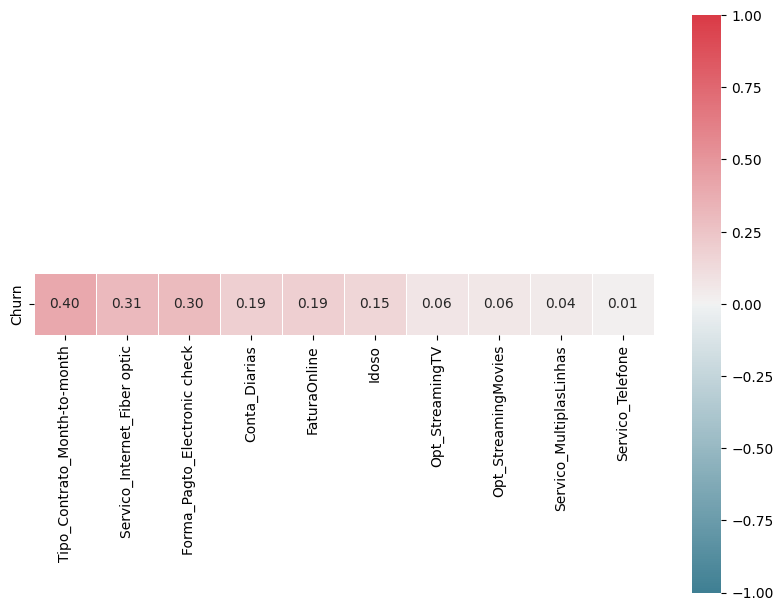

In [36]:
f, ax = plt.subplots(figsize=(10, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlacao_alvo_top10, cmap=cmap, vmax=1, vmin=-1, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

OBS: Não há Features fortemente relacionadas (acima de 0.8), pois já eliminamos isso anteriormente (Ex: Gasto_Total x Gasto_Mensal x Gasto_Diário e Tempo_Contrato x Gasto_Total) e também na remoção dos valores binários na etapa de Encoding.

### Salvar os Datasets para uso futuro

In [37]:
df_enc.to_parquet('data/ouro/Telecom_X_Encoded.parquet')

### Separando o dataframe em X, y (Feature Matrix and Target Vector)

In [38]:
x = df_enc.drop(columns=['remainder__'+col_alvo], axis=1)
y = df_enc['remainder__'+col_alvo]

print(x.shape)
print(y.shape)

(7032, 25)
(7032,)


In [39]:
df_x = pd.DataFrame(x)
df_x.to_parquet('data/ouro/X_Completo.parquet')
df_y = pd.DataFrame(y)
df_y.to_parquet('data/ouro/Y_Completo.parquet')


### Separando o dataframe em Treino, Teste e Validação

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.15, stratify=y_train_full, random_state=42)

print('               X      -     y')
print(f'Treino   : {x_train.shape} - {y_train.shape}  = {x_train.shape[0]/x.shape[0]*100:.2f}%')
print(f'Validação: {x_val.shape}  - {y_val.shape}   = {x_val.shape[0]/x.shape[0]*100:.2f}%')
print(f'Teste    : {x_test.shape}  - {y_test.shape} = {x_test.shape[0]/x.shape[0]*100:.2f}%')


               X      -     y
Treino   : (5080, 25) - (5080,)  = 72.24%
Validação: (897, 25)  - (897,)   = 12.76%
Teste    : (1055, 25)  - (1055,) = 15.00%


# OPCIONAL: Testes com Balanceamento e seleção de Features em modelos

**O balanceamento deve ser realizado apenas nos dados de Treino!** Evita-se utilizar o balanceamento antes de separar os dados de teste e validação para evitar vazamento de dados, ou seja, validar o modelo com dados não reais.


## Realizar o balanceamento com SMOTEENN


In [42]:
y.value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.734215
1.0,0.265785


In [43]:
y_train.value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.734055
1.0,0.265945


In [44]:
from imblearn.combine import SMOTEENN

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, precision_recall_curve


In [45]:
sample = SMOTEENN(random_state=123,sampling_strategy=1.0)
x_train_bal, y_train_bal = sample.fit_resample(x_train,y_train)

y_train_bal.value_counts(normalize=True)

,proportion
remainder__Churn,
1.0,0.553452
0.0,0.446548


## Testando alguns modelos para verificar Features relevantes

In [46]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

         0.0       0.94      0.56      0.70       775
         1.0       0.43      0.91      0.58       280

    accuracy                           0.65      1055
   macro avg       0.69      0.73      0.64      1055
weighted avg       0.81      0.65      0.67      1055



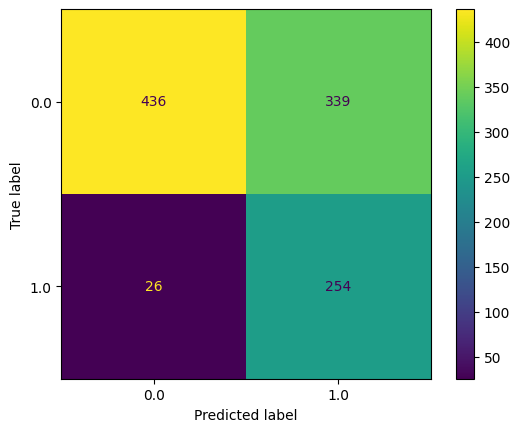

In [47]:
# Testando com uma Árvore de decisão

modelo_tree = DecisionTreeClassifier(max_depth = 3)

modelo_tree.fit(x_train_bal, y_train_bal)
y_previsto_tree = modelo_tree.predict(x_test)

print(classification_report(y_test, y_previsto_tree))

ConfusionMatrixDisplay.from_predictions(y_test, y_previsto_tree);



In [48]:
print(f'Acurácia no conjunto de treino : {modelo_tree.score(x_train, y_train)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {modelo_tree.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 66.2205%
Acurácia no conjunto de valid  : 67.7815%


OBS: Devido à baixa acurácia do modelo Árvore, Vamos tentar o Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
modelo_rf = RandomForestClassifier(max_depth = 3)
modelo_rf.fit(x_train_bal, y_train_bal)
print(f'Acurácia no conjunto de treino : {modelo_rf.score(x_train_bal, y_train_bal)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {modelo_rf.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 90.9131%
Acurácia no conjunto de valid  : 70.1226%


              precision    recall  f1-score   support

         0.0       0.92      0.61      0.74       775
         1.0       0.44      0.86      0.59       280

    accuracy                           0.68      1055
   macro avg       0.68      0.74      0.66      1055
weighted avg       0.80      0.68      0.70      1055



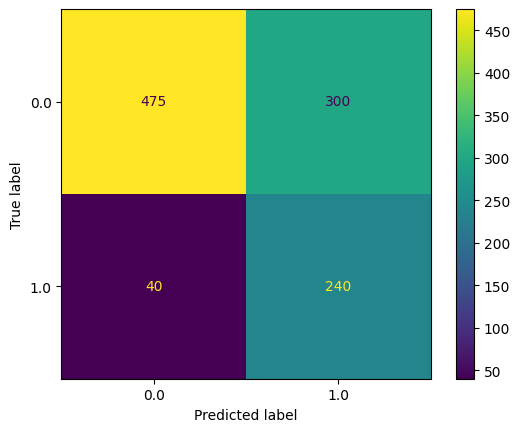

In [51]:
y_previsto_rf = modelo_rf.predict(x_test)

print(classification_report(y_test, y_previsto_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_previsto_rf);


## Função para cálculo de métricas

In [52]:
def calcular_metricas_classificacao(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metricas = {
        'Acurácia': round(accuracy, 4),
        'Precisão': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    }

    return metricas

## Feature Engineer - Seleção de recursos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


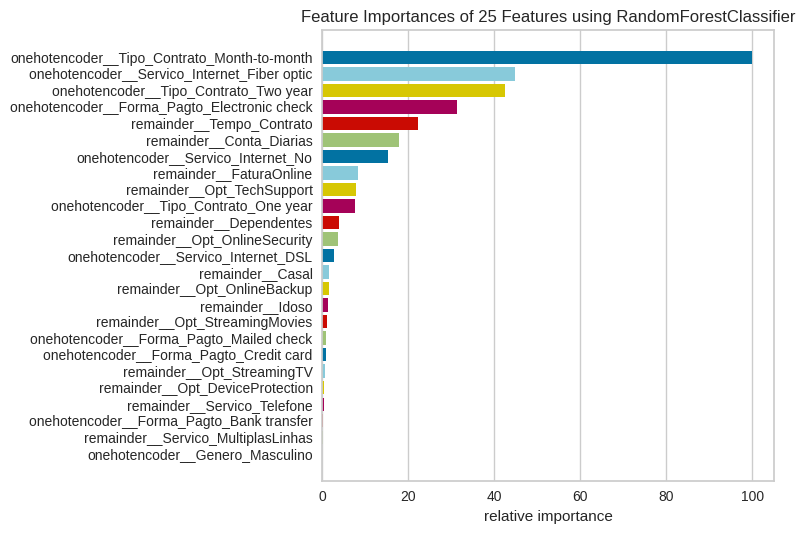

<Axes: title={'center': 'Feature Importances of 25 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [53]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(modelo_rf)
viz.fit(x_train_bal, y_train_bal)
viz.show()

In [54]:
modelo_rf.feature_importances_


array([1.54294029e-07, 8.72043877e-03, 1.41625325e-01, 4.83401711e-02,
       3.15620118e-01, 2.40632941e-02, 1.34175601e-01, 8.10859144e-04,
       2.40352045e-03, 9.88247648e-02, 2.54302520e-03, 3.88875022e-03,
       4.98158700e-03, 1.18690292e-02, 7.04430620e-02, 1.47418216e-03,
       2.41535541e-04, 1.15847577e-02, 4.78557315e-03, 1.50467460e-03,
       2.46664925e-02, 2.08004982e-03, 3.43176591e-03, 2.60018540e-02,
       5.59194141e-02])

Não mostrar a importância relativa e apenas as mais importantes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


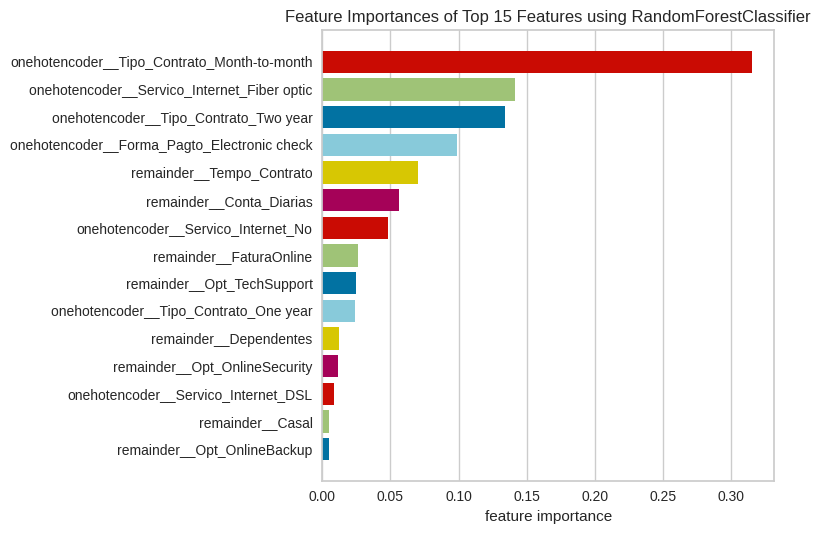

<Axes: title={'center': 'Feature Importances of Top 15 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [55]:
viz = FeatureImportances(modelo_rf, relative=False, topn=15)
viz.fit(x_train_bal, y_train_bal)
viz.show()


In [56]:
importances = modelo_rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x_train_bal.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
4,onehotencoder__Tipo_Contrato_Month-to-month,3.156201e-01
2,onehotencoder__Servico_Internet_Fiber optic,1.416253e-01
6,onehotencoder__Tipo_Contrato_Two year,1.341756e-01
9,onehotencoder__Forma_Pagto_Electronic check,9.882476e-02
14,remainder__Tempo_Contrato,7.044306e-02
24,remainder__Conta_Diarias,5.591941e-02
3,onehotencoder__Servico_Internet_No,4.834017e-02
23,remainder__FaturaOnline,2.600185e-02
20,remainder__Opt_TechSupport,2.466649e-02
5,onehotencoder__Tipo_Contrato_One year,2.406329e-02


In [57]:
results_df = pd.DataFrame(index=['Acurácia','Precisão','Recall','F1 Score'])

model_selected_features = RandomForestClassifier(max_depth=3, random_state=42)

for count in [1, 5, 10, 15, 20, 20, 25]:
  selected_features = feature_importances['feature'].values[:count]

  x_train_selected = x_train_bal[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train_bal)
  y_pred_selected = model_selected_features.predict(x_test_selected)
  metricas = calcular_metricas_classificacao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df


,top_1,top_5,top_10,top_15,top_20,top_25
Acurácia,0.6408,0.6474,0.6796,0.6806,0.6834,0.6749
Precisão,0.4160,0.4226,0.4457,0.4465,0.4492,0.4418
Recall,0.8750,0.8964,0.8500,0.8500,0.8536,0.8536
F1 Score,0.5639,0.5744,0.5848,0.5855,0.5887,0.5822


In [58]:
results_df = pd.DataFrame(index=['Acurácia','Precisão','Recall','F1 Score'])

model_selected_features = RandomForestClassifier(max_depth=3, random_state=42)

for count in range(4,16):
  selected_features = feature_importances['feature'].values[:count]

  x_train_selected = x_train_bal[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train_bal)
  y_pred_selected = model_selected_features.predict(x_test_selected)
  metricas = calcular_metricas_classificacao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df

,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15
Acurácia,0.6341,0.6474,0.6635,0.6777,0.6739,0.6720,0.6796,0.6815,0.6768,0.6787,0.6787,0.6806
Precisão,0.4137,0.4226,0.4339,0.4444,0.4416,0.4400,0.4457,0.4478,0.4428,0.4453,0.4451,0.4465
Recall,0.9071,0.8964,0.8786,0.8571,0.8643,0.8643,0.8500,0.8571,0.8429,0.8571,0.8536,0.8500
F1 Score,0.5682,0.5744,0.5809,0.5854,0.5845,0.5831,0.5848,0.5882,0.5806,0.5861,0.5851,0.5855


OBS: Podemos observar que utilizando 12 Features conseguimos um F1-Score (que combina Precisão e Recall) melhor do que quando utilizamos mais Features, com boa Acurácia, então iremos limitar nosso treinamento em 12 Features

In [59]:
## vamos deixar essa decisão para a próxima etapa, realizando a seleção de features em cada modelo dentro de um pipeline
## NÃO VAI EXECUTAR ESSE TRECHO
if 1==0:
  selected_features = feature_importances['feature'].values[:12]

  x_selected_features = x[selected_features]

  x_train_full, x_test, y_train_full, y_test = train_test_split(x_selected_features, y, test_size=0.15, stratify=y, random_state=42)
  x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.15, stratify=y_train_full, random_state=42)
  sample = SMOTEENN(random_state=42,sampling_strategy=1.0)
  x_train, y_train = sample.fit_resample(x_train,y_train)

  print(y_train.value_counts(normalize=True))
  print('--------------------------------------------')
  print('               X      -     y')
  print(f'Treino   : {x_train.shape} - {y_train.shape}  = {x_train.shape[0]/x.shape[0]*100:.2f}%')
  print(f'Validação: {x_val.shape}  - {y_val.shape}   = {x_val.shape[0]/x.shape[0]*100:.2f}%')
  print(f'Teste    : {x_test.shape}  - {y_test.shape} = {x_test.shape[0]/x.shape[0]*100:.2f}%')


#🔧 3. Treinar Modelos de classificação.


In [60]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import f1_score, precision_score, recall_score

In [61]:
models = {
    'Random Forest': RandomForestClassifier(max_depth=5,random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

In [62]:
results = []
for model_name, model in models.items():
    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=42)),
        ('feature_selection', SelectKBest(score_func=f_classif, k=12)),
        ('classifier', model)
    ])

    # Treinar
    pipeline.fit(x_train, y_train)

    # Avaliar no conjunto de validação

    y_val_pred = pipeline.predict(x_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)

    # Avaliar no conjunto de teste
    y_test_pred = pipeline.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results.append({
        'Modelo': model_name,
        'Acurácia (Validação)': acc_val,
        'F1-Score (Validação)': f1_val,
        'Precisão (Validação)': precision_val,
        'Recall (Validação)': recall_val,
        'Acurácia (Teste)': acc_test,
        'F1-Score (Teste)': f1_test,
        'Precisão (Teste)': precision_test,
        'Recall (Teste)': recall_test
    })
    print(f"\nModelo: {model_name}")
    print(f"Acurácia (Validação): {acc_val:.4f}")
    print(f"F1-Score (Validação): {f1_val:.4f}")
    print(f"Precisão (Validação): {precision_val:.4f}")
    print(f"Recall (Validação): {recall_val:.4f}")
    print(f"Acurácia (Teste): {acc_test:.4f}")
    print(f"F1-Score (Teste): {f1_test:.4f}")
    print(f"Precisão (Teste): {precision_test:.4f}")
    print(f"Recall (Teste): {recall_test:.4f}")

# Resumo em DataFrame
results_df = pd.DataFrame(results)



Modelo: Random Forest
Acurácia (Validação): 0.7101
F1-Score (Validação): 0.6108
Precisão (Validação): 0.4744
Recall (Validação): 0.8571
Acurácia (Teste): 0.6938
F1-Score (Teste): 0.5978
Precisão (Teste): 0.4589
Recall (Teste): 0.8571

Modelo: SVM
Acurácia (Validação): 0.7057
F1-Score (Validação): 0.6012
Precisão (Validação): 0.4693
Recall (Validação): 0.8361
Acurácia (Teste): 0.6919
F1-Score (Teste): 0.5828
Precisão (Teste): 0.4549
Recall (Teste): 0.8107

Modelo: Logistic Regression
Acurácia (Validação): 0.7001
F1-Score (Validação): 0.6038
Precisão (Validação): 0.4649
Recall (Validação): 0.8613
Acurácia (Teste): 0.6986
F1-Score (Teste): 0.6005
Precisão (Teste): 0.4632
Recall (Teste): 0.8536


In [63]:
print("Resumo dos Resultados:")
results_df

Resumo dos Resultados:


,Modelo,Acurácia (Validação),F1-Score (Validação),Precisão (Validação),Recall (Validação),Acurácia (Teste),F1-Score (Teste),Precisão (Teste),Recall (Teste)
0,Random Forest,0.710145,0.610778,0.474419,0.857143,0.693839,0.597758,0.458891,0.857143
1,SVM,0.705686,0.601208,0.469340,0.836134,0.691943,0.582798,0.454910,0.810714
2,Logistic Regression,0.700111,0.603829,0.464853,0.861345,0.698578,0.600503,0.463178,0.853571


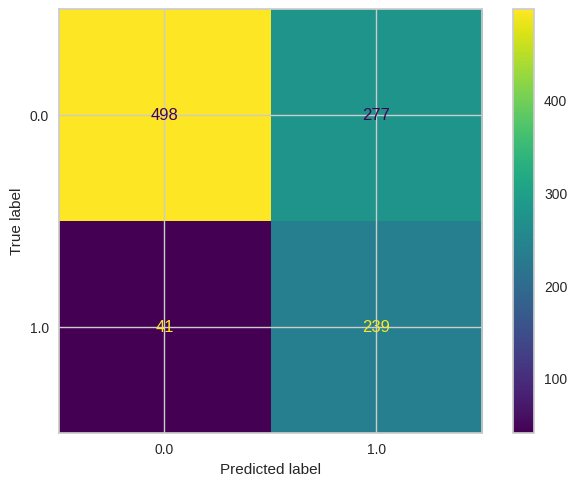

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);

### Aprimorando os modelos com técnicas de otimização de hiperparâmetros

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import  roc_curve, precision_recall_curve, roc_auc_score, auc

In [66]:
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [2, 3, 5, 7],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    }
}

In [67]:
roc_data = {}
pr_data = {}
confusion_matrices = {}

In [68]:
results = []
for model_name, mp in model_params.items():
    # Pipeline com SMOTEENN, seleção de features e modelo
    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=42)),
        ('feature_selection', SelectKBest(score_func=f_classif, k=12)),
        ('classifier', mp['model'])
    ])

    # Grid Search com validação cruzada (5 folds) no conjunto de treinamento
    grid_search = GridSearchCV(
        pipeline,
        mp['params'],
        cv=5,  # 5-fold CV
        scoring='f1',  # Métrica principal: F1-score
        n_jobs=-1  # Paralelizar para acelerar
    )
    grid_search.fit(x_train, y_train)

    # Melhor modelo e parâmetros encontrados
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_  # F1-score médio na CV

    # Avaliar no conjunto de validação
    y_val_pred = best_model.predict(x_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)

    # Avaliar no conjunto de teste
    y_test_pred = best_model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    # Previsões de probabilidade no conjunto de teste para curvas
    y_test_proba = best_model.predict_proba(x_test)[:, 1]

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    roc_data[model_name] = {'fpr': fpr.tolist(), 'tpr': tpr.tolist(), 'auc': roc_auc}

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(recall, precision)
    pr_data[model_name] = {'recall': recall.tolist(), 'precision': precision.tolist(), 'auc': pr_auc}

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[model_name] = cm.tolist()

    results.append({
        'Modelo': model_name,
        'Melhores Parâmetros': best_params,
        'F1-Score (CV Treinamento)': best_score,
        'F1-Score (Validação)': f1_val,
        'Acurácia (Validação)': acc_val,
        'Precisão (Validação)': precision_val,
        'Recall (Validação)': recall_val,
        'Acurácia (Teste)': acc_test,
        'F1-Score (Teste)': f1_test,
        'Precisão (Teste)': precision_test,
        'Recall (Teste)': recall_test
    })
    print(f"\nModelo: {model_name}")
    print(f"Melhores Parâmetros: {best_params}")
    print(f"F1-Score (CV Treinamento): {best_score:.4f}")

# Resumo em DataFrame
results_df = pd.DataFrame(results)


Modelo: Random Forest
Melhores Parâmetros: {'classifier__max_depth': 7, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
F1-Score (CV Treinamento): 0.6086

Modelo: SVM
Melhores Parâmetros: {'classifier__C': 1, 'classifier__kernel': 'linear'}
F1-Score (CV Treinamento): 0.6066

Modelo: Logistic Regression
Melhores Parâmetros: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
F1-Score (CV Treinamento): 0.6061


In [69]:
print("Resumo dos Resultados:")
results_df

Resumo dos Resultados:


,Modelo,Melhores Parâmetros,F1-Score (CV Treinamento),F1-Score (Validação),Acurácia (Validação),Precisão (Validação),Recall (Validação),Acurácia (Teste),F1-Score (Teste),Precisão (Teste),Recall (Teste)
0,Random Forest,"{'classifier__max_depth': 7, 'classifier__min_...",0.608626,0.613003,0.721293,0.485294,0.831933,0.703318,0.600255,0.467197,0.839286
1,SVM,"{'classifier__C': 1, 'classifier__kernel': 'li...",0.606642,0.602374,0.701226,0.465596,0.852941,0.696682,0.596977,0.461089,0.846429
2,Logistic Regression,"{'classifier__C': 1, 'classifier__solver': 'lb...",0.606132,0.603829,0.700111,0.464853,0.861345,0.698578,0.600503,0.463178,0.853571


In [70]:
# Selecionar o melhor modelo geral (baseado no F1-score no teste)
best_overall = results_df.loc[results_df['F1-Score (Teste)'].idxmax()]
print(f"\nMelhor Combinação Geral: {best_overall['Modelo']} com Parâmetros {best_overall['Melhores Parâmetros']}")
print(f"F1-Score no Teste: {best_overall['F1-Score (Teste)']:.4f}")


Melhor Combinação Geral: Logistic Regression com Parâmetros {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
F1-Score no Teste: 0.6005


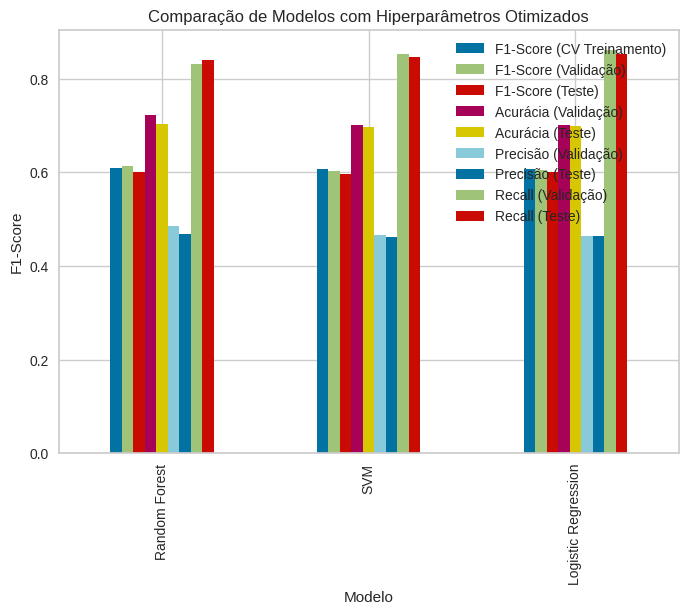

In [71]:

results_df.plot(x='Modelo', y=['F1-Score (CV Treinamento)', 'F1-Score (Validação)', 'F1-Score (Teste)', 'Acurácia (Validação)', 'Acurácia (Teste)',
                               'Precisão (Validação)', 'Precisão (Teste)', 'Recall (Validação)', 'Recall (Teste)'], kind='bar')
plt.title('Comparação de Modelos com Hiperparâmetros Otimizados')
plt.ylabel('F1-Score')
plt.show()

### Curva ROC

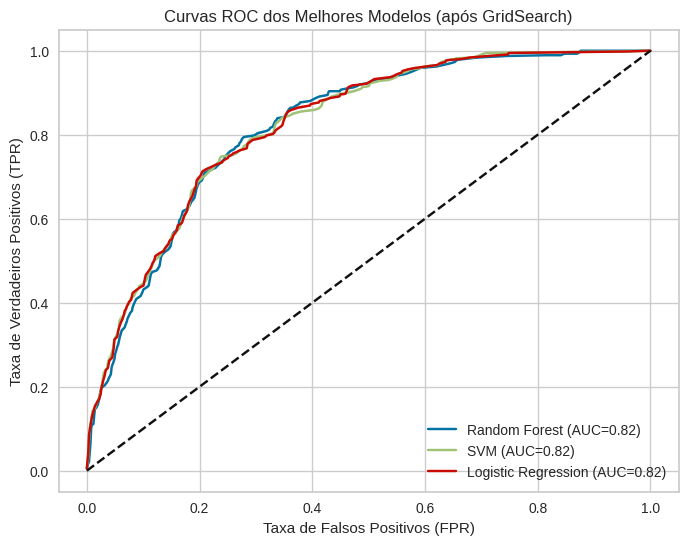

In [72]:
plt.figure(figsize=(8, 6))
for model_name, data in roc_data.items():
    sns.lineplot(x=data['fpr'], y=data['tpr'], label=f"{model_name} (AUC={data['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.title('Curvas ROC dos Melhores Modelos (após GridSearch)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

### Curvas Precision-Recall

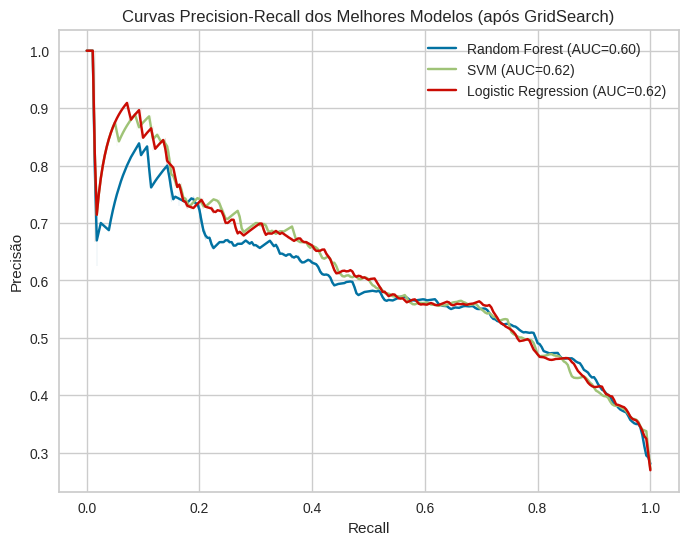

In [73]:

plt.figure(figsize=(8, 6))
for model_name, data in pr_data.items():
    sns.lineplot(x=data['recall'], y=data['precision'], label=f"{model_name} (AUC={data['auc']:.2f})")
plt.title('Curvas Precision-Recall dos Melhores Modelos (após GridSearch)')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.legend()
plt.show()

### Matrizes de Confusão

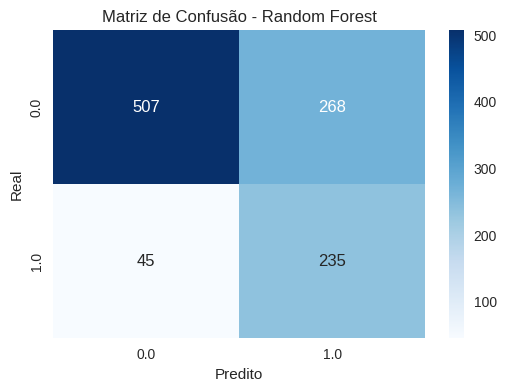

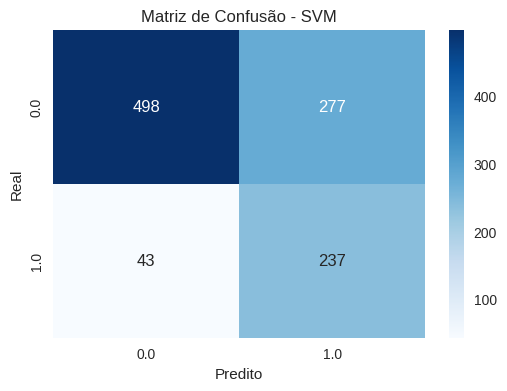

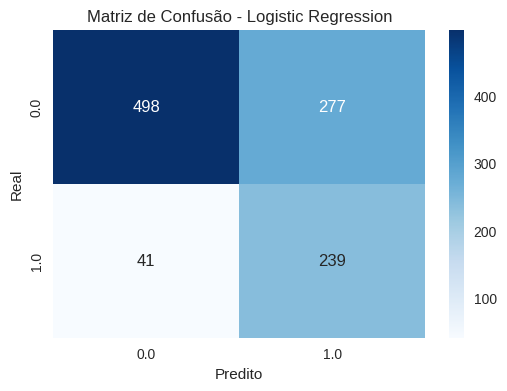

In [74]:

for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0.0', '1.0'], yticklabels=['0.0', '1.0'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

OBS: O Modelo Random Forest apresentou melhores resultados, então vamos explorar melhor esse modelo com base nas principais métricas de avaliação e testar diferentes hiperparâmetros, para encontrar a melhor combinação.

#📈 4. Avaliar o desempenho dos modelos com métricas.

Analisando o contexto do problema de Churn de clientes, observamos que é importante Priorizar o Recall para capturar o máximo de clientes em risco, mas também é importante  monitorar a precisão para evitar ações desnecessárias, sendo assim, vamos rodar novamente o GridSearchCV com o Recall como Métrica de avaliação:

In [75]:
# Dicionário de modelos e grids de parâmetros
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [1, 2, 3, 5, 7],  # Exemplo: valores para max_depth
            'classifier__n_estimators': [50, 100, 200],
            'classifier__min_samples_split': [2, 5, 10],
            'feature_selection__k': [5, 7, 11, 12]
        }
    }
}
# Armazenar resultados, dados para curvas e matrizes de confusão
results = []
roc_data = {}
pr_data = {}
confusion_matrices = {}

In [76]:
score_metrics = ['f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy']
#sel_score = score_metrics[4]
for sel_score in score_metrics:
  for model_name, mp in model_params.items():
      # Pipeline com SMOTEENN, seleção de features e modelo
      pipeline = Pipeline([
          ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=42)),
          ('feature_selection', SelectKBest(score_func=f_classif)),
          ('classifier', mp['model'])
      ])

      # Grid Search com validação cruzada (5 folds) no conjunto de treinamento
      grid_search = GridSearchCV(
          pipeline,
          mp['params'],
          cv=5,  # 5-fold CV
          scoring=sel_score, # Métrica principal: 'f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy'
          n_jobs=5,  # Paralelizar para acelerar
          verbose=1
      )
      grid_search.fit(x_train, y_train)

      # Melhor modelo e parâmetros encontrados
      best_model = grid_search.best_estimator_
      best_params = grid_search.best_params_
      best_score = grid_search.best_score_  # F1-score médio na CV

      # Avaliar no conjunto de validação
      y_val_pred = best_model.predict(x_val)
      acc_val = accuracy_score(y_val, y_val_pred)
      f1_val = f1_score(y_val, y_val_pred)
      precision_val = precision_score(y_val, y_val_pred)
      recall_val = recall_score(y_val, y_val_pred)

      # Avaliar no conjunto de teste
      y_test_pred = best_model.predict(x_test)
      acc_test = accuracy_score(y_test, y_test_pred)
      f1_test = f1_score(y_test, y_test_pred)
      precision_test = precision_score(y_test, y_test_pred)
      recall_test = recall_score(y_test, y_test_pred)


      # Previsões de probabilidade no conjunto de teste para curvas
      y_test_proba = best_model.predict_proba(x_test)[:, 1]

      # Curva ROC
      fpr, tpr, _ = roc_curve(y_test, y_test_proba)
      roc_auc = roc_auc_score(y_test, y_test_proba)
      roc_data[model_name] = {'fpr': fpr.tolist(), 'tpr': tpr.tolist(), 'auc': roc_auc}

      # Curva Precision-Recall
      precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
      pr_auc = auc(recall, precision)
      pr_data[model_name] = {'recall': recall.tolist(), 'precision': precision.tolist(), 'auc': pr_auc}

      # Matriz de confusão
      cm = confusion_matrix(y_test, y_test_pred)
      confusion_matrices[model_name] = cm.tolist()

      results.append({
          'Modelo': model_name,
          'Melhores Parâmetros': best_params,
          'Score Utilizado': sel_score,
          'Best-Score (CV Train)': best_score,
          'F1-Score (Validação)': f1_val,
          'Acurácia (Validação)': acc_val,
          'Precisão (Validação)': precision_val,
          'Recall (Validação)': recall_val,
          'Acurácia (Teste)': acc_test,
          'F1-Score (Teste)': f1_test,
          'Precisão (Teste)': precision_test,
          'Recall (Teste)': recall_test
      })
      print(f"\nModelo: {model_name}")
      print(f"Melhores Parâmetros: {best_params}")
      print(f"Best-Score (CV Treinamento): {best_score:.4f} - {sel_score}")
      print(f"Acurácia (Validação): {acc_val:.4f}")
      print(f"F1-Score (Validação): {f1_val:.4f}")
      print(f"Precisão (Validação): {precision_val:.4f}")
      print(f"Recall   (Validação): {recall_val}")
      print(f"ROC-AUC: {roc_auc:.4f}")
      print(f"PR-AUC: {pr_auc:.4f}")
      print(f"Matriz de Confusão:\n{cm}")

# Resumo em DataFrame
results_df = pd.DataFrame(results)


Fitting 5 folds for each of 180 candidates, totalling 900 fits

Modelo: Random Forest
Melhores Parâmetros: {'classifier__max_depth': 7, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 7}
Best-Score (CV Treinamento): 0.6141 - f1
Acurácia (Validação): 0.7090
F1-Score (Validação): 0.6087
Precisão (Validação): 0.4732
Recall   (Validação): 0.8529411764705882
ROC-AUC: 0.8223
PR-AUC: 0.5751
Matriz de Confusão:
[[503 272]
 [ 39 241]]
Fitting 5 folds for each of 180 candidates, totalling 900 fits

Modelo: Random Forest
Melhores Parâmetros: {'classifier__max_depth': 7, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 11}
Best-Score (CV Treinamento): 0.4829 - precision
Acurácia (Validação): 0.7179
F1-Score (Validação): 0.6114
Precisão (Validação): 0.4818
Recall   (Validação): 0.8361344537815126
ROC-AUC: 0.8219
PR-AUC: 0.5943
Matriz de Confusão:
[[506 269]
 [ 44 236]]
Fitting 5 folds for each of 180 candidates, 

In [77]:
print("\nResumo dos Resultados:")
results_df



Resumo dos Resultados:


,Modelo,Melhores Parâmetros,Score Utilizado,Best-Score (CV Train),F1-Score (Validação),Acurácia (Validação),Precisão (Validação),Recall (Validação),Acurácia (Teste),F1-Score (Teste),Precisão (Teste),Recall (Teste)
0,Random Forest,"{'classifier__max_depth': 7, 'classifier__min_...",f1,0.614053,0.608696,0.709030,0.473193,0.852941,0.705213,0.607818,0.469786,0.860714
1,Random Forest,"{'classifier__max_depth': 7, 'classifier__min_...",precision,0.482915,0.611367,0.717949,0.481840,0.836134,0.703318,0.601274,0.467327,0.842857
2,Random Forest,"{'classifier__max_depth': 1, 'classifier__min_...",recall,0.917094,0.563636,0.625418,0.407895,0.911765,0.631280,0.567297,0.411955,0.910714
3,Random Forest,"{'classifier__max_depth': 7, 'classifier__min_...",accuracy,0.718307,0.611367,0.717949,0.481840,0.836134,0.703318,0.601274,0.467327,0.842857
4,Random Forest,"{'classifier__max_depth': 7, 'classifier__min_...",balanced_accuracy,0.758786,0.608696,0.709030,0.473193,0.852941,0.705213,0.607818,0.469786,0.860714


In [78]:
# Selecionar o melhor modelo geral (baseado no Recall no teste)
best_overall = results_df.loc[results_df['Recall (Teste)'].idxmax()]
print(f"\nMelhor Combinação Recall: {best_overall['Modelo']} com Parâmetros {best_overall['Melhores Parâmetros']}")
print(f"Recall no Teste: {best_overall['Recall (Teste)']:.4f}")
best_overall = results_df.loc[results_df['Precisão (Teste)'].idxmax()]
print(f"\nMelhor Combinação Precisão: {best_overall['Modelo']} com Parâmetros {best_overall['Melhores Parâmetros']}")
print(f"Precisão no Teste: {best_overall['Precisão (Teste)']:.4f}")


Melhor Combinação Recall: Random Forest com Parâmetros {'classifier__max_depth': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'feature_selection__k': 12}
Recall no Teste: 0.9107

Melhor Combinação Precisão: Random Forest com Parâmetros {'classifier__max_depth': 7, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 7}
Precisão no Teste: 0.4698


Como o objetivo deste projeto é identificar da melhor forma possível os possíveis Churns, vamos utilizar a combinação que oferece o melhor indice de acertos neste caso, utilizando o Recall como principal parametro, e compará-lo com o modelo de melhor Precisão, que tem a melhor taxa de acerto de Não Churn.


In [79]:
model_params = {
    'Random Forest-1': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [1],  # Exemplo: valores para max_depth
            'classifier__n_estimators': [100],
            'classifier__min_samples_split': [2],
            'feature_selection__k': [10]  # Diferentes números de features
        }
    },
    'Random Forest-7': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [7],  # Exemplo: valores para max_depth
            'classifier__n_estimators': [50],
            'classifier__min_samples_split': [2],
            'feature_selection__k': [11]  # Diferentes números de features
        }
    }
}
# Armazenar resultados, dados para curvas e matrizes de confusão
results = []
roc_data = {}
pr_data = {}
confusion_matrices = {}

In [80]:
sel_score = score_metrics[1] # Precision
for model_name, mp in model_params.items():
    # Pipeline com SMOTEENN, seleção de features e modelo
    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=42)),
        ('feature_selection', SelectKBest(score_func=f_classif)),
        ('classifier', mp['model'])
    ])

    # Grid Search com validação cruzada (5 folds) no conjunto de treinamento
    grid_search = GridSearchCV(
        pipeline,
        mp['params'],
        cv=5,  # 5-fold CV
        scoring=sel_score, # Métrica principal: 'f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy'
        n_jobs=5  # Paralelizar para acelerar
    )
    grid_search.fit(x_train, y_train)

    # Melhor modelo e parâmetros encontrados
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_  # F1-score médio na CV

    # Avaliar no conjunto de validação
    y_val_pred = best_model.predict(x_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)

    # Avaliar no conjunto de teste
    y_test_pred = best_model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)


    # Previsões de probabilidade no conjunto de teste para curvas
    y_test_proba = best_model.predict_proba(x_test)[:, 1]

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    roc_data[model_name] = {'fpr': fpr.tolist(), 'tpr': tpr.tolist(), 'auc': roc_auc}

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(recall, precision)
    pr_data[model_name] = {'recall': recall.tolist(), 'precision': precision.tolist(), 'auc': pr_auc}

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[model_name] = cm.tolist()

    results.append({
        'Modelo': model_name,
        'Melhores Parâmetros': best_params,
        'Score Utilizado': sel_score,
        'Best-Score (CV Train)': best_score,
        'F1-Score (Validação)': f1_val,
        'Acurácia (Validação)': acc_val,
        'Precisão (Validação)': precision_val,
        'Recall (Validação)': recall_val,
        'Acurácia (Teste)': acc_test,
        'F1-Score (Teste)': f1_test,
        'Precisão (Teste)': precision_test,
        'Recall (Teste)': recall_test
    })
    print(f"\nModelo: {model_name}")
    print(f"Melhores Parâmetros: {best_params}")
    print(f"Best-Score (CV Treinamento): {best_score:.4f} - {sel_score}")
    print(f"Acurácia (Validação): {acc_val:.4f}")
    print(f"F1-Score (Validação): {f1_val:.4f}")
    print(f"Precisão (Validação): {precision_val:.4f}")
    print(f"Recall   (Validação): {recall_val}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print(f"Matriz de Confusão:\n{cm}")

# Resumo em DataFrame
results_df = pd.DataFrame(results)


Modelo: Random Forest-1
Melhores Parâmetros: {'classifier__max_depth': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'feature_selection__k': 10}
Best-Score (CV Treinamento): 0.4157 - precision
Acurácia (Validação): 0.6265
F1-Score (Validação): 0.5644
Precisão (Validação): 0.4087
Recall   (Validação): 0.9117647058823529
ROC-AUC: 0.8019
PR-AUC: 0.5870
Matriz de Confusão:
[[411 364]
 [ 25 255]]

Modelo: Random Forest-7
Melhores Parâmetros: {'classifier__max_depth': 7, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 11}
Best-Score (CV Treinamento): 0.4829 - precision
Acurácia (Validação): 0.7179
F1-Score (Validação): 0.6114
Precisão (Validação): 0.4818
Recall   (Validação): 0.8361344537815126
ROC-AUC: 0.8219
PR-AUC: 0.5943
Matriz de Confusão:
[[506 269]
 [ 44 236]]


### Salvando o melhor modelo com Pickle

In [89]:
import pickle

In [93]:
os.makedirs('data/models', exist_ok=True)

# Salvar o melhor modelo com pickle
model_filename = f'data/models/{model_name.replace(" ", "_")}.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Modelo {model_name} salvo em {model_filename}")

Modelo Random Forest-7 salvo em data/models/Random_Forest-7.pkl


### Carregando o Modelo Salvo com Pickle (Exemplo de uso)

In [91]:
# Não irá executar! Somente exemplo de uso:
if 1==0:

  import pickle

  # Carregar um modelo salvo
  model_filename = 'models/Random_Forest-7.pkl'
  with open(model_filename, 'rb') as file:
      loaded_model = pickle.load(file)

  # Usar o modelo carregado para previsões
  y_pred = loaded_model.predict(x_test)
  print(f"Previsões com o modelo {model_name}:", y_pred)

### Curva ROC

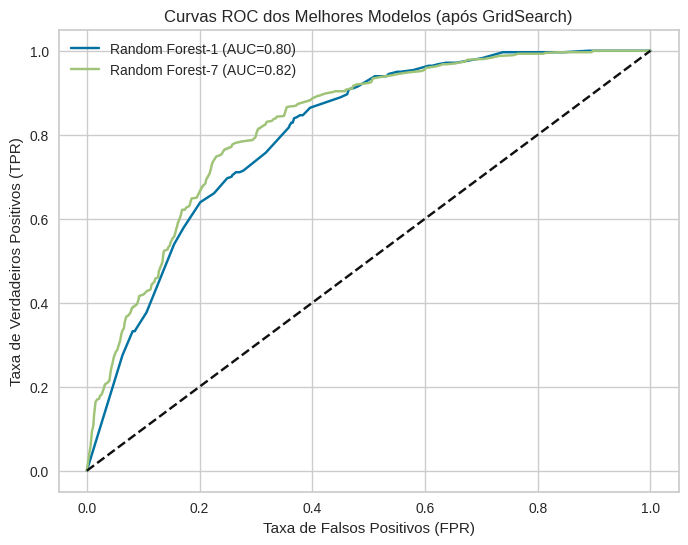

In [81]:
plt.figure(figsize=(8, 6))
for model_name, data in roc_data.items():
    sns.lineplot(x=data['fpr'], y=data['tpr'], label=f"{model_name} (AUC={data['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.title('Curvas ROC dos Melhores Modelos (após GridSearch)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

### Curvas Precision-Recall

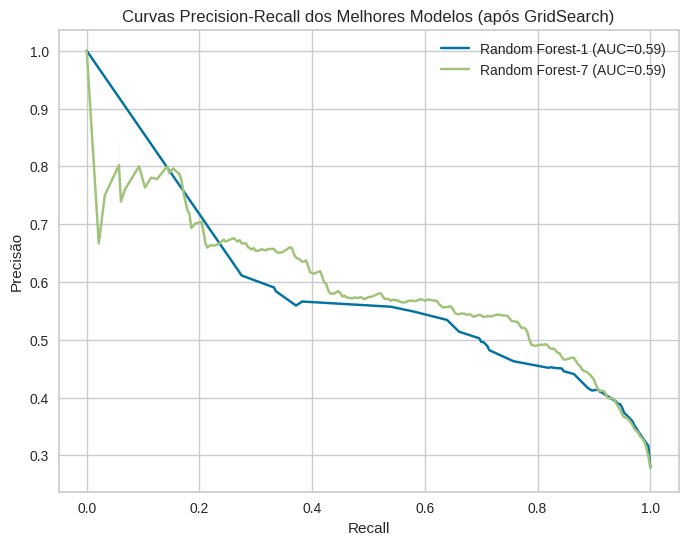

In [82]:

plt.figure(figsize=(8, 6))
for model_name, data in pr_data.items():
    sns.lineplot(x=data['recall'], y=data['precision'], label=f"{model_name} (AUC={data['auc']:.2f})")
plt.title('Curvas Precision-Recall dos Melhores Modelos (após GridSearch)')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.legend()
plt.show()

### Matrizes de Confusão

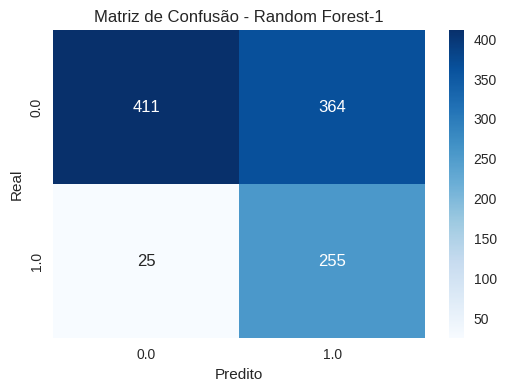

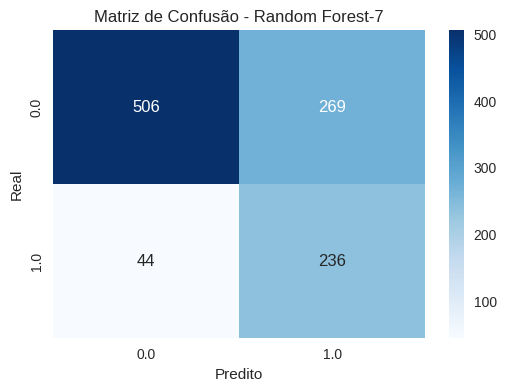

In [83]:

for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0.0', '1.0'], yticklabels=['0.0', '1.0'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

#🔎 5. Interpretar os resultados, incluindo a importância das variáveis.

Observamos que nos dois modelos selecionados, temos duas faces do problema.

Observando a Matriz de confusão de ambos, temos:

1- O primeiro modelo apresenta uma melhor performance no indicador Recall, significando que tem o menor numero de Falsos Negativos, indicando que tem uma melhor previsão de clientes que podem ter Churn.

2- O segundo modelo apresenta uma melhor performance no indicado Precision, com isso temos uma melhor previsão de Verdadeiros Negativos, ou seja, preve melhor aqueles clientes que não irão evadir (Churn = 0).

Como nosso objetivo é prever clientes que potencialmente cancelem os serviços (Churn = 1), devemos utilizar o modelo 1, que tem mais precisão nessa previsão, mesmo que alguns clientes que sejam provaveis Churn não cheguem a cancelar os serviços.

OBS: Para melhor entendimento, deixei o diagrama da Matriz de Confusão abaixo:

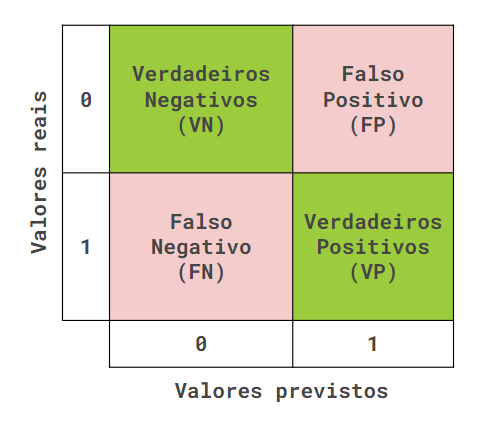

### Avaliação das Features mais significativas para Churn

In [84]:
import shap
from matplotlib.colors import TwoSlopeNorm

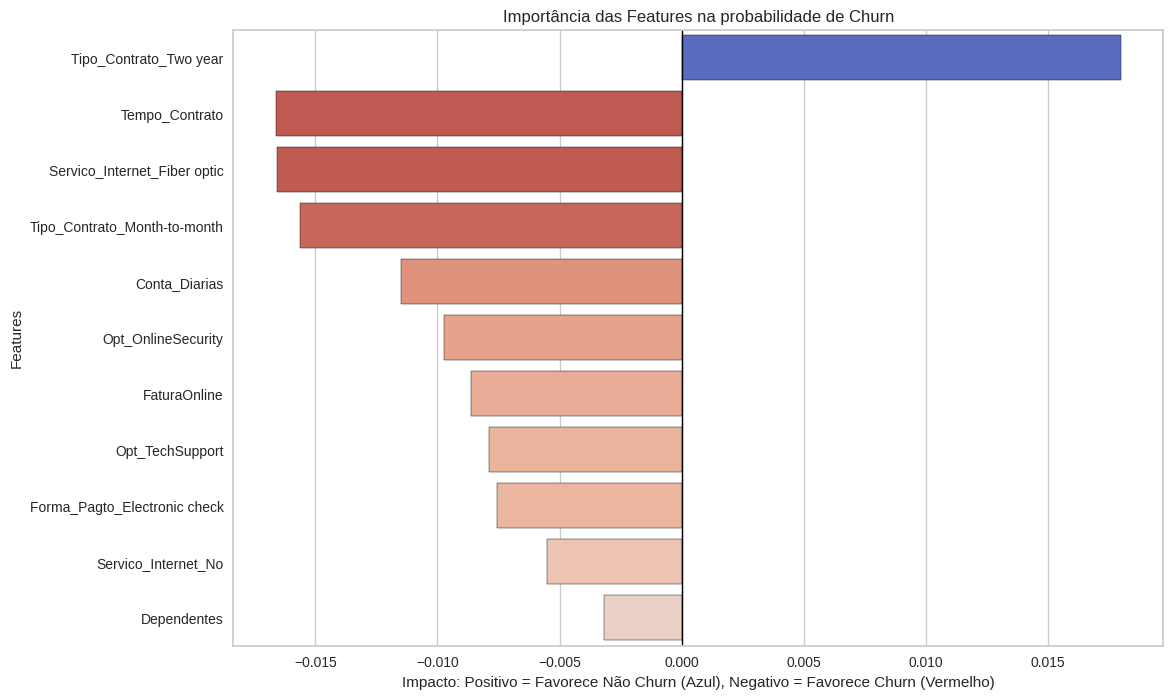

In [85]:
selected_features_mask = best_model.named_steps['feature_selection'].get_support()
feature_names = x.columns[selected_features_mask].tolist()
feature_names = [name.replace('onehotencoder__', '').replace('remainder__', '') for name in feature_names]
x_test_transformed = best_model.named_steps['feature_selection'].transform(x_test)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=feature_names)
explainer = shap.TreeExplainer(best_model.named_steps['classifier'], feature_names=feature_names)
shap_values = explainer(x_test_transformed_df)
shap_values_class1 = shap_values.values[:, :, 1] if shap_values.values.ndim == 3 else shap_values.values
mean_shap = np.mean(shap_values_class1, axis=0)
abs_mean_shap = np.abs(mean_shap)
sorted_idx = np.argsort(abs_mean_shap)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_mean_shap = mean_shap[sorted_idx]
df_shap = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Mean SHAP Value': sorted_mean_shap
})
plt.figure(figsize=(12, 8))
norm = TwoSlopeNorm(vmin=-0.020, vcenter=0, vmax=0.020)
cmap = plt.get_cmap('coolwarm_r')
colors = [cmap(norm(value)) for value in df_shap['Mean SHAP Value']]

sns.barplot(
    x='Mean SHAP Value',
    y='Feature',
    hue=colors,
    palette=colors,
    data=df_shap,
    dodge=False,
    edgecolor='black'
)
plt.axvline(0, color='black', linewidth=1)
plt.title('Importância das Features na probabilidade de Churn')
plt.xlabel('Impacto: Positivo = Favorece Não Churn (Azul), Negativo = Favorece Churn (Vermelho)')
plt.ylabel('Features')
plt.legend([], [], frameon=False)
plt.show()


Conforme podemos observar no gráfico acima, os atributos com maior impacto no Churn aparecem listados em tons de vermelho, e aqueles que impactam positivamente, ou seja, que previnem o Churn aparecem em azul.

### Aprimorando o gráfico com SHAD

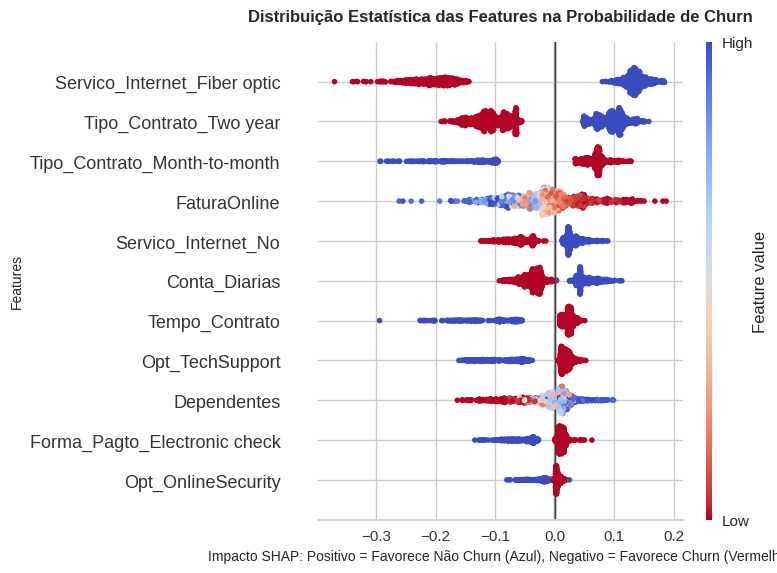

In [87]:
selected_features_mask = best_model.named_steps['feature_selection'].get_support()
feature_names = x.columns[selected_features_mask].tolist()
feature_names = [name.replace('onehotencoder__', '').replace('remainder__', '') for name in feature_names]

x_test_transformed = best_model.named_steps['feature_selection'].transform(x_test)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=feature_names)

explainer = shap.TreeExplainer(best_model.named_steps['classifier'], feature_names=feature_names)
shap_values = explainer(x_test_transformed_df)
shap_values_class1 = shap_values.values[:, :, 1] if shap_values.values.ndim == 3 else shap_values.values

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_class1, x_test_transformed_df, feature_names=sorted_feature_names,
                  plot_type="dot", color_bar=True, cmap='coolwarm_r',
                  show=False)

plt.title('Distribuição Estatística das Features na Probabilidade de Churn', pad=15, fontsize=12, weight='bold')
plt.xlabel('Impacto SHAP: Positivo = Favorece Não Churn (Azul), Negativo = Favorece Churn (Vermelho)', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.axvline(0, color='black', linewidth=1, alpha=0.7)
plt.tight_layout()
plt.show()

# 🎯 6. Conclusão:

O modelo pode ajudar a identificar clientes com potencial de Churn e algumas das ações abaixo podem ser tomadas para previnir a evasão de clientes (Churn), de forma individual ou combinada:

1- Priorizar contratos de longo prazo:
  Oferecer descontos progressivos, e/ou recursos adicionais nos contratos com maior prazo para fidelizar clientes.

2- Clientes com contratos a mais tempo, tendem a evadir, portanto, é importante estabelecer estratégias de Marketing, oferecer facilidades ou descontos a clientes que tem contratos com tempo acima da média.

3- Clientes com serviços de Fibra Ótica podem estar insatisfeitos com os serviços prestados, pois há indicações altas de probabilidade de Churn nestes casos.

4- Clientes com contratos mensais tem maior evasão, como no caso 1, priorizar contratos mais longos pode previnir a evasão.

5- Clientes com contas mais altas tem mais probabilidade de evasão.

6- Clientes com os serviços opcionais: OnlineSecurity e TechSupport tem maior evasão, indicando provaveis problemas com este serviço ou custos elevados dos mesmos.

7- Clientes com pagamentos do tipo Eletronic Check tem maior probabilidade de evasão, pode ser interessante oferecer descontos para pagamentos automáticos via cartão de crédito por exemplo.

8 - Clientes sem contrato de serviço de telefone tem maior probabilidade de Churn: Oferecer esse serviço em combos com a Internet de Fibra pode prevenir a evasão.

Em resumo, sugerimos identificar os clientes com potêncial de Churn com o modelo acima e estabelecer uma estratégia de marketing direcionada aos mesmos com um combo de serviços que inclua:

- Contrato de 2 anos
- Internet de Fibra com Linha de Telefone
- Pagamento eletronico automático com Cartão de Crédito ou Débito automático

Dessa forma fidelizaremos os clientes mais propensos a evasão e podemos ainda utilizar essa estratégia para atrair e reter mais clientes.


### Download dos arquivos gerados

In [92]:
# Zip the data folder
!zip -r data.zip data

# Download the zip file
from google.colab import files
files.download('data.zip')

updating: data/ (stored 0%)
updating: data/ouro/ (stored 0%)
updating: data/ouro/X_Completo.parquet (deflated 26%)
updating: data/ouro/Telecom_X_Encoded.parquet (deflated 26%)
updating: data/ouro/Y_Completo.parquet (deflated 28%)
updating: data/Images/ (stored 0%)
updating: data/bronze/ (stored 0%)
updating: data/prata/ (stored 0%)
updating: data/prata/TelecomX_Data.parquet (deflated 26%)
  adding: data/models/ (stored 0%)
  adding: data/models/Random_Forest-7.pkl (deflated 85%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>